In [1]:
%matplotlib inline
import yt
import pyxsim
import yt.units as u
import matplotlib.pyplot as plt
import xspec

In [2]:
ds = yt.load("GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0100")

yt : [INFO     ] 2016-11-02 12:06:06,277 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-11-02 12:06:06,278 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-11-02 12:06:06,303 Parameters: current_time              = 7.89058001997e+16
yt : [INFO     ] 2016-11-02 12:06:06,304 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2016-11-02 12:06:06,305 Parameters: domain_left_edge          = [ -3.70272000e+24  -3.70272000e+24  -3.70272000e+24]
yt : [INFO     ] 2016-11-02 12:06:06,306 Parameters: domain_right_edge         = [  3.70272000e+24   3.70272000e+24   3.70272000e+24]
yt : [INFO     ] 2016-11-02 12:06:06,307 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2016-11-02 12:06:07,535 xlim = -1542838790481162138550272.000000 1542838790481162138550272.000000
yt : [INFO     ] 2016-11-02 12:06:07,535 ylim = -1542838790481162138550272.000000 1542838790481162138550272.000000
yt : [INFO     ] 2016-11-02 12:06:07,537 xlim = -1542838790481162138550272.000000 1542838790481162138550272.000000
yt : [INFO     ] 2016-11-02 12:06:07,538 ylim = -1542838790481162138550272.000000 1542838790481162138550272.000000
yt : [INFO     ] 2016-11-02 12:06:07,540 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2016-11-02 12:06:07,605 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



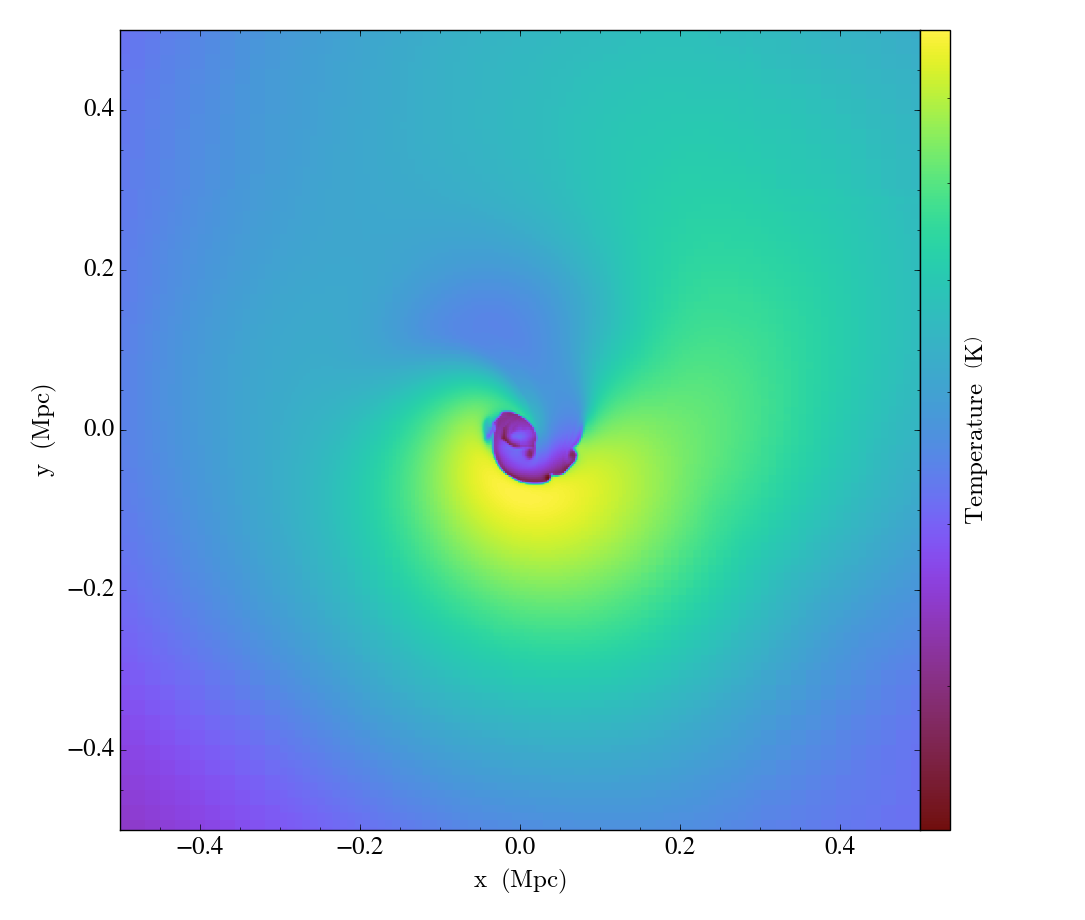
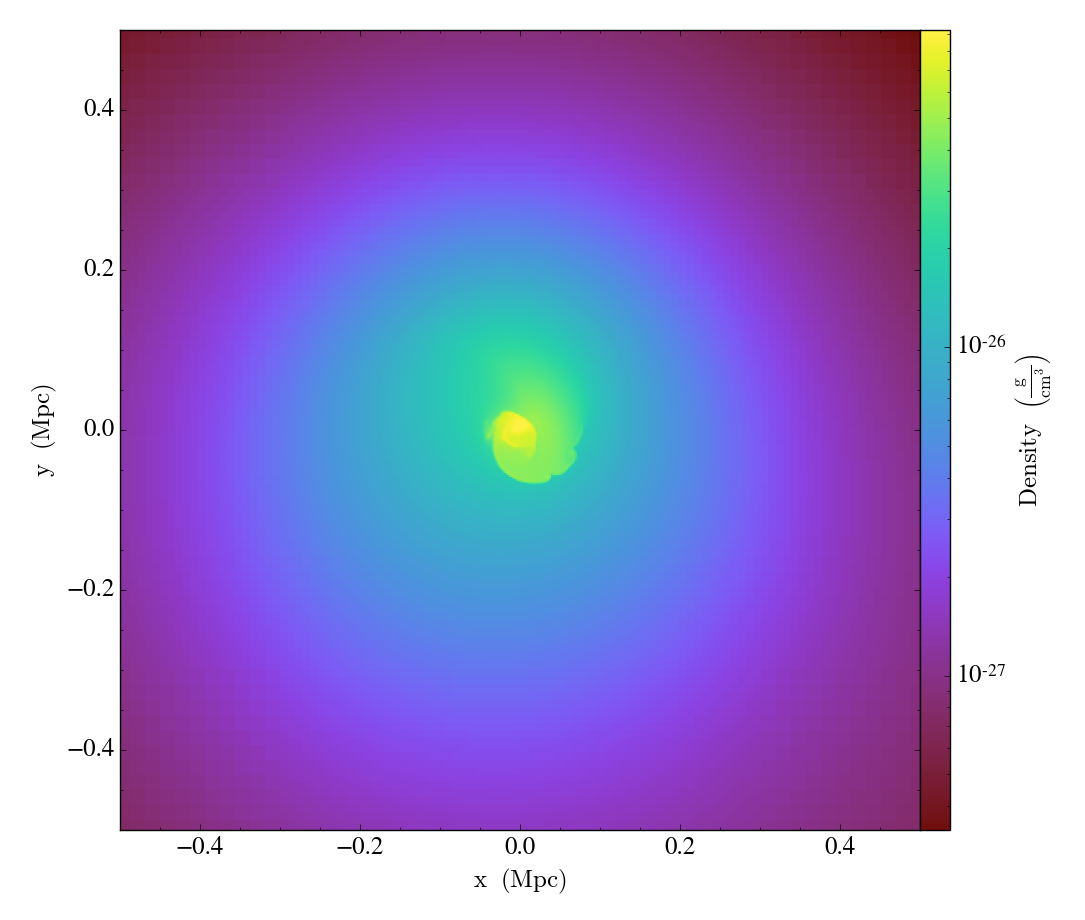

In [3]:
slc = yt.SlicePlot(ds, "z", ["density", "temperature"], width=(1.0,"Mpc"))
slc.show()

In [4]:
sp = ds.sphere("c", (500.,"kpc"))

In [5]:
spec_model = pyxsim.XSpecThermalModel("bapec", 0.05, 11.0, 10000)

In [6]:
source_model = pyxsim.ThermalSourceModel(spec_model, Zmet=0.3)

In [7]:
exp_time = (500., "ks") # exposure time
area = (2000.0, "cm**2") # collecting area
redshift = 0.05

In [8]:
photons = pyxsim.PhotonList.from_data_source(sp, redshift, area, exp_time, source_model)

pyxsim: [INFO     ] 2016-11-02 12:06:09,835 Cosmology: h = 0.71, omega_matter = 0.27, omega_lambda = 0.73
pyxsim: [INFO     ] 2016-11-02 12:06:09,847 Using emission measure field '(gas, emission_measure)'.
pyxsim: [INFO     ] 2016-11-02 12:06:09,848 Using temperature field '(gas, temperature)'.
Generating photons :   0%|          | 1/2450256 [00:00<400:54:58,  1.70it/s]/home/bcanning/.local/lib/python2.7/site-packages/pyxsim/source_models.py:260: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  energies[ei:ei+cn] = cell_e
Generating photons : 100%|██████████| 2450256/2450256 [03:17<00:00, 12382.51it/s]
pyxsim: [INFO     ] 2016-11-02 12:09:32,057 Finished generating photons.
pyxsim: [INFO     ] 2016-11-02 12:09:32,786 Number of photons generated: 157678369
pyxsim: [INFO     ] 2016-11-02 12:09:32,787 Number of cells with photons: 2450256


In [9]:
tbabs_model = pyxsim.XSpecAbsorbModel("TBabs", 0.04)

In [10]:
events_z = photons.project_photons("z", exp_time_new=(100.,"ks"), absorb_model=tbabs_model,
                                   sky_center=(45.,30.))

pyxsim: [INFO     ] 2016-11-02 12:10:07,725 Absorbing.
pyxsim: [INFO     ] 2016-11-02 12:10:33,986 Total number of observed photons: 11687979
/home/bcanning/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [11]:
events_acis = pyxsim.ACIS_I(events_z)

pyxsim: [INFO     ] 2016-11-02 12:10:49,748 Applying energy-dependent effective area.


RuntimeError: Cannot find the response matrix in the RMF file acisi_aimpt_cy18.rmf! It should be named "MATRIX" or "SPECRESP MATRIX".

In [ ]:
events_acis.write_fits_image("sloshing_z_img.fits", emin=0.5, emax=7.0, clobber=True)

In [ ]:
import aplpy
fig = aplpy.FITSFigure("sloshing_z_img.fits")
fig.show_colorscale(cmap='arbre', vmax=10, vmin=0.0, stretch='sqrt')
fig.recenter(45., 30., radius=0.1)